# The Sparks Foundation-Data Science & Business Analytics Internship                                                          GRIP (JAN 2022)
                                      

### Author- ANKIT KUMAR

##### Task 1: Prediction using supervised ML
In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

##### Dataset is available at: http://bit.ly/w-data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
# Reading data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
print("Data imported successfully")
data.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.isnull().sum() #Checking that if our dataset contains any null or missing values

Hours     0
Scores    0
dtype: int64

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

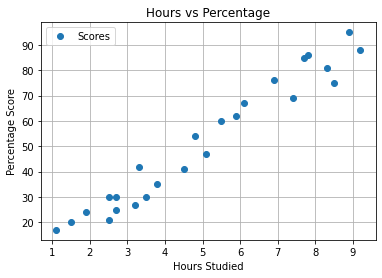

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X = data.iloc[:, :-1].values  #inputs
y = data.iloc[:, 1].values #output 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)# Taking test size as 20% of the data
                             

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
from sklearn.linear_model import LinearRegression  # Linear Regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed.")

Training completed.


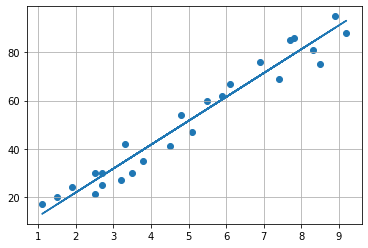

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_ # y=mx+c (equation of a straight line)

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.grid()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print(X_test) # Testing data(in hours)
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted 
Act_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Act_vs_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
# Prediction for result
hours = 9.25
result = regressor.predict([[hours]])
print("No of Hours = ",hours)
print("Predicted Score = ",result[0])

No of Hours =  9.25
Predicted Score =  93.69173248737535


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
      

Mean Absolute Error: 4.183859899002975
